# Handcrafted K-means Clustering

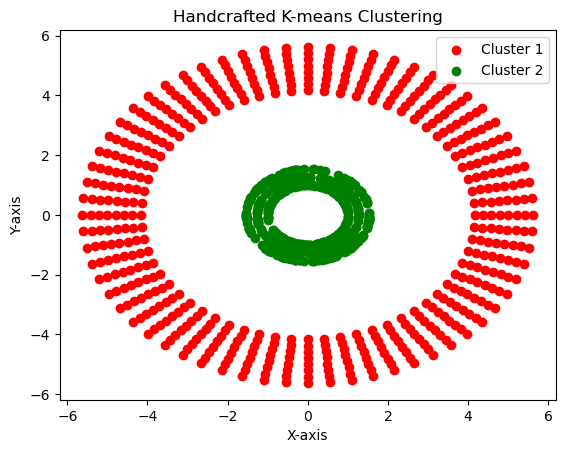

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
x = np.loadtxt("kmeans_data.txt")

# Compute squared Euclidean distance for each data point
fx = np.sum(x**2, axis=1).reshape(-1, 1)

# Initialize cluster centers (u) using the first two data points
u = fx[:2, :]

# Assign each data point to the nearest cluster
c = np.argmin(np.sum((fx[:, np.newaxis] - u)**2, axis=2), axis=1).reshape(-1, 1)

# Update cluster centers and reassign data points for a fixed number of iterations (10 in this case)
for _ in range(10):
    # Compute new cluster centers as the mean of data points assigned to each cluster
    u = np.array([np.mean(fx[c.flatten() == i], axis=0) for i in range(len(np.unique(c)))])
    
    # Reassign data points to the nearest cluster
    c = np.argmin(np.sum((fx[:, np.newaxis] - u)**2, axis=2), axis=1).reshape(-1, 1)

# Separate data points based on cluster assignment
p = (c == 1).flatten()
n = (c == 0).flatten()

# Plot the clustered data points with different colors for each cluster
plt.scatter(x[p, 0], x[p, 1], c='r', label='Cluster 1')
plt.scatter(x[n, 0], x[n, 1], c='g', label='Cluster 2')

# Plotting details
plt.title("Handcrafted K-means Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()

# Save the plot as a PNG file
plt.savefig('handcrafted.png')

# Display the plot
plt.show()

   


# Landmark K-means Clustering

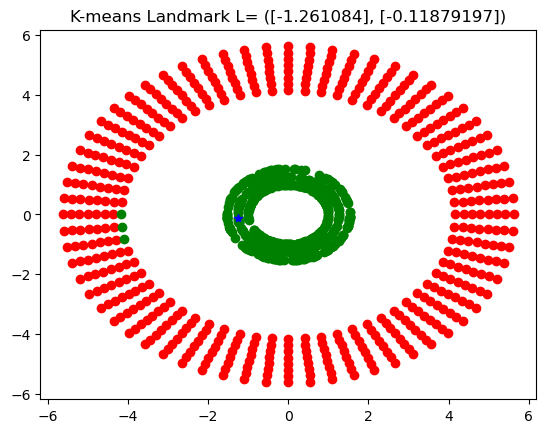

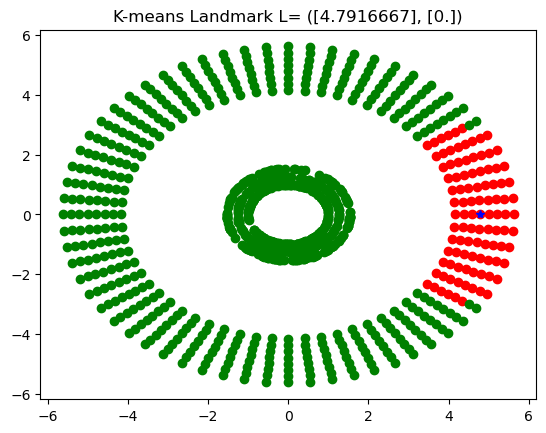

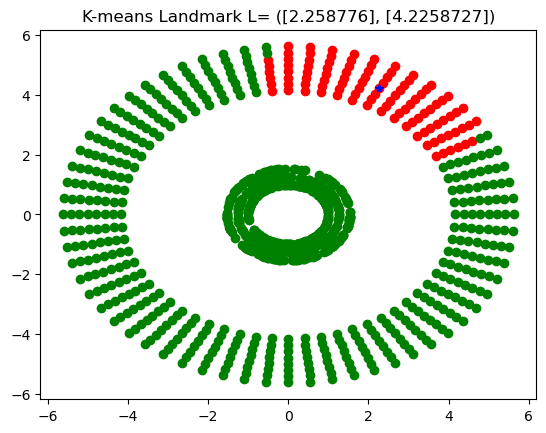

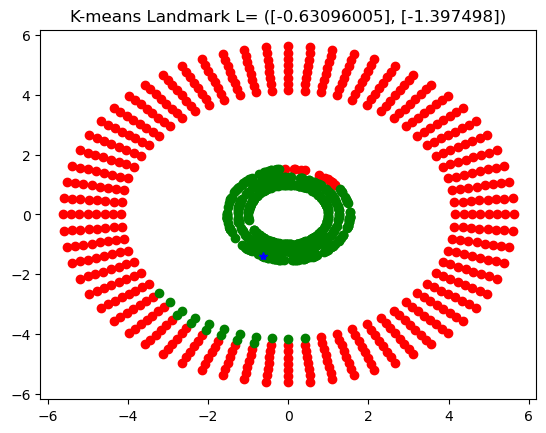

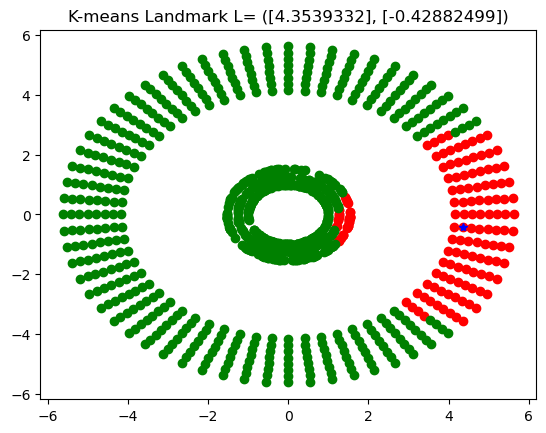

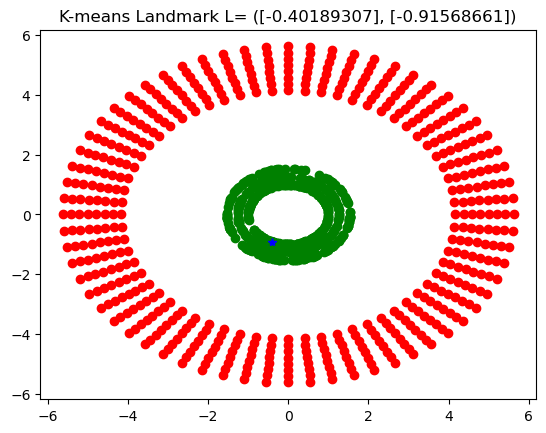

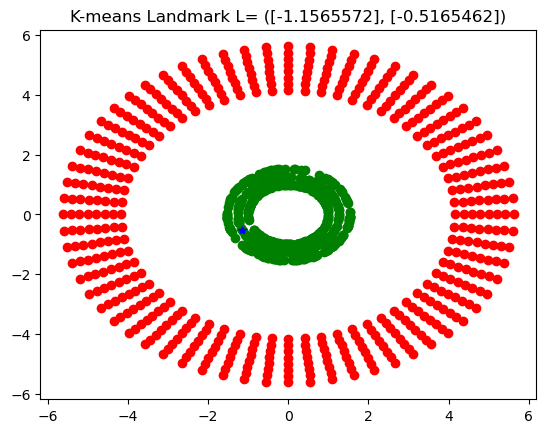

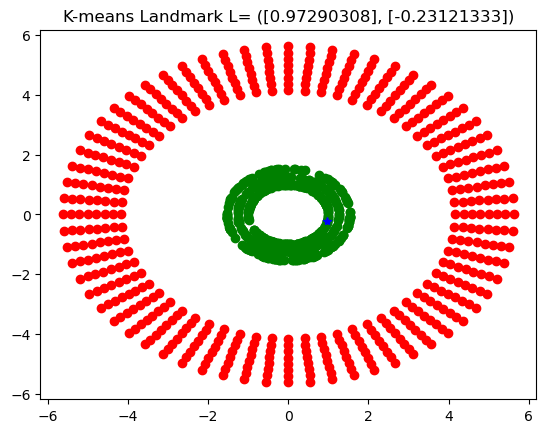

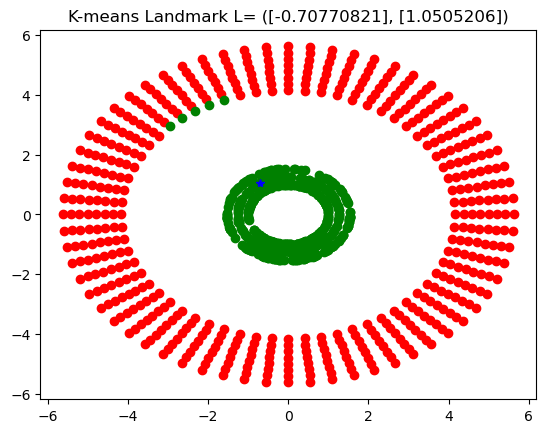

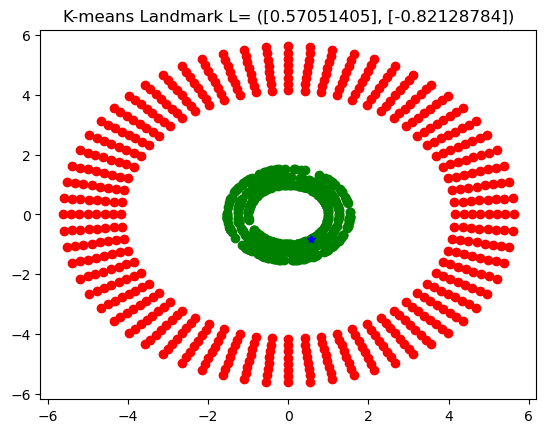

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
x = np.loadtxt("kmeans_data.txt")

# Define Radial Basis Function (RBF) kernel
def rbf_kernel(x, y):
    return np.exp(-0.1 * np.sum(np.square(x - y.reshape((1, -1))), axis=1)).reshape(-1, 1)

# Perform K-means with landmarks for a fixed number of iterations (10 in this case)
for iteration in range(10):
    # Randomly select a landmark index 'z'
    z = np.random.randint(250, size=1)

    # Compute RBF kernel values for each data point with the selected landmark
    fx = rbf_kernel(x, x[z, :])

    # Initialize cluster centers (u) using the RBF kernel values of the first two data points
    u = fx[:2, :]

    # Assign each data point to the nearest cluster
    c = np.argmin(np.sum((fx[:, np.newaxis] - u)**2, axis=2), axis=1).reshape(-1, 1)

    # Update cluster centers and reassign data points for a fixed number of iterations (10 in this case)
    for _ in range(10):
        # Compute new cluster centers as the mean of data points assigned to each cluster
        u = np.array([np.mean(fx[c.flatten() == i], axis=0) for i in range(len(np.unique(c)))])
        
        # Reassign data points to the nearest cluster
        c = np.argmin(np.sum((fx[:, np.newaxis] - u)**2, axis=2), axis=1).reshape(-1, 1)

    # Separate data points based on cluster assignment
    p = (c == 1).flatten()
    n = (c == 0).flatten()

    # Plot the clustered data points with different colors for each cluster
    plt.figure()
    plt.scatter(x[p, 0], x[p, 1], c='r')
    plt.scatter(x[n, 0], x[n, 1], c='g')

    # Plot the selected landmark
    plt.plot(x[z, 0], x[z, 1], 'b*')

    # Plotting details
    plt.title(f"K-means Landmark L= ({x[z, 0]}, {x[z, 1]})")
    plt.savefig(f'iter{iteration}.png')
    plt.show()
